|--- | Revenir à la [page déroulement](../README.ipynb) | [Intro Octave 2](intro_octave_2.ipynb)|
|-------------|---|---|

---
# Intro. Octave 1
--- 


| Revenir à la [page déroulement](Readme.md) |
|-------------|


Initiation aux logiciels de calcul interprétés Matlab/Octave pour le signal

Les supports :
- Le [sujet standard sur moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759)  
- Un notebook de ce Github sur [pourquoi Octave/Matlab](https://github.com/balaise31/Signal/blob/tds/continu/tps/pourquoi_octave.ipynb) 
- Un notebook de ce Github sur [une intro à octave](https://github.com/balaise31/Signal/blob/tds/continu/tps/initiation_octave/prise_en_main.ipynb)

Après les deux séances, il faudra aller sur le [ici sur moodle](https://moodle.insa-toulouse.fr/mod/quiz/view.php?id=24772) faire le test qui consiste à :
 - donner les noms du binôme
 - prendre connaissance de la valeur moyenne à calculer (elle est tirée au hasard comme, par exemple, $\int\limits_{t=0}^{\pi}tcos(2t)dt$)
 - modifier votre script pour qu'il calcule cette intégrale, renseigner la valeur moyenne calculée par le script et le déposer sur le site.

 Des indications et aides sur la manière d'approcher la valeur moyenne d'un signal sont donnée dans la fin de ce document.

# Installer ou travailler en ligne avec Matlab/Octave
---

## 0 Utiliser la version en ligne des Jupyter notebook avec Binder

Par exemple en cliquant sur ce badge

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/HEAD?labpath=continu%2Ftds%2Fintro_octave.ipynb) 

Vous pouvez exécuter ce Notebook sur votre navigateur.

Sélectionnez une **cellule de code Matblab**, modifiez-la et ensuite faite **Shift + Entrée** pour exécuter la cellule et voir le résultat.

## 1 Méthode installer sur Linux : d'avenir mais lourde

- Si vous n'avez pas Linux installé, et une machine avec au moins 2/4G de ram) faites-le sur une machine virtuelle, car vous aurez à utiliser Linux au second semestre en ADA et système d'exploitation et plus tard dans maintes matières (filtrage numérique, programmation C, Réseau etc.)
  * installer un virtualiseur tel que virtualbox : [indications détaillées sur open-classroom](https://openclassrooms.com/fr/courses/2035806-virtualisez-votre-architecture-et-vos-environnements-de-travail/6313946-installez-virtualbox)
  *  récupérer une image disque (fichier .iso) d'un CD d'install de Linux (je vous conseille  Ubuntu comme en TP)
  *  installez linux sur une machine virtuelle (choisissez un disque dur de taille variable et de grosse taille !, ce n'est qu'une simulation et vous ne prendrez pas plus de place sur votre disque)
- installer octave dans Linux en ouvrant un terminal (CTRL+ALT+T) et en tapant la commande `sudo apt install octave` (vous donnerez le mot de passe de l'utilisateur avec droits que vous avez créé lors de l'installation de Linux)
- en option : récupérez ce site Git et installez jupyter et les notebook octave/python en suivant les 5 instructions données sur [ce site](https://github.com/balaise31/Signal/blob/discret/installation/README.md)

Pour utiliser le lanceur linux, appuyez sur la touche META (Touche Windows) et taper `octa`, il suffit de sélectionner octave qui doit apparaître dans la recherche.


## 2 Méthode installer sur Windows/Mac

Installez octave en local sur votre machine en suivant ce site et lien [Octave MacOs](https://wiki.octave.org/Octave_for_macOS) ou [Octave Windows (325 Mo)](https://www.gnu.org/software/octave/download#ms-windows).

Vous avez l'équivalent (sans Simulink !) de Matlab mais en gratuit et libre.

## 3 En ligne avec MonTp.Insa

Il faut être vue dans le réseau INSA (résidence Insa ou wifi Insa), sinon vous devez utiliser votre VPN pour être vue comme si vous étiez à l'INSA.

Pour installer le [VPN c'est ici](https://telechargement.insa-toulouse.fr/dl_vpn.html)

**Indispensable en cas de confinement ou distanciel !!**

Allez ensuite sur le site [monTp.insa](https://montp.insa-toulouse.fr), choisissez une **salle de TP virtuelle Windows** et lancez Matlab. (Octave n'est installé ni sur Linux, ni sur windows cette année...)



# Séance 1 (équivalent exos 1 à 3 du sujet standard)
---

Une séance plutôt passive où :
- je présente le pourquoi de ces nouveaux langages (vs Ada) avec [pourquoi Octave/Matlab](https://github.com/balaise31/Signal/blob/tds/continu/tps/pourquoi_octave ;
- je fais une intro à Matlab dans le style [une intro à octave](https://github.com/balaise31/Signal/blob/tds/continu/tps/initiation_octave/prise_en_main.ipynb).

À l'issue de cette intro les concepts de :
- langage interprété ;
- débugueur ;
- le polymorphisme et la manipulation de variable matricielle ;
- la fonction d'affichage plot ;
- la représentation d'un signal par un tableau de temps "t" et un tableau de valeur ;
- l'écriture d'une fonction dans un fichier (exemple de l'échelon avec u.m) ;
- l'écriture d'une fonction en ligne avec ''' f =@(t) sin(2*....) ''' ;
- la **vectorisation** des fonction et calcul : appliquer une fonction à des matrices et scalaires ;
- la nuance entre opérateurs par défaut qui sont matriciels (A*B avec A:(n x m) et B : (m x p) donne du (n x p) ) et les opérateurs élément par élément de matrices (A .* B qui pour deux matrices (n x m) donne la matrice de même taille).

On arrive au script octave permettant de tracer le produit de deux fonctions :


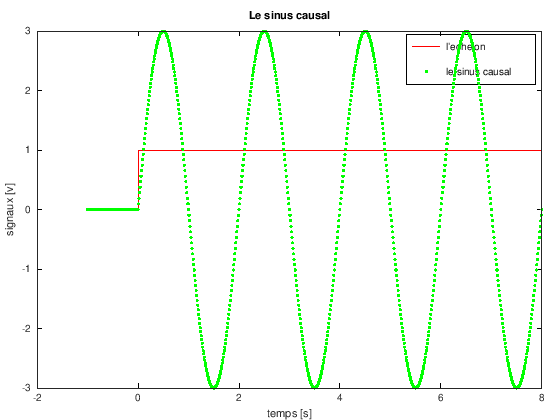

In [9]:
%% Fait le ménage
clear all % les variables
close all % ferme les fenêtres
clc       % efface la console (fenêtre de commandes)

%% Fonctions usuelles vectorisées
u = @(x) x>0 ;   % fonction échelon (astuce vrai = 1)
constante = @(x) x./x ;% fonction constante t --> 1 (astuce division élément par élément donne 1.)
porte = @(x,a,b) u(x-a) - u(x-b) ;% fonction porte vaut 1 de a à b et 0 sinon


%% définition de paramètres et constantes
Te = 0.01; % période d'échantillonnage [s]
t=-1:Te:8 ; % vecteur temps 


%% définition des signaux
A = 3;  % amplitude du signal [V]
F = 0.5; % fréquence du signal [Hz]
f= @(t,F) u(t) .* sin(2*pi*F*t) * A;
%               ^ 
%              /|\
%               |
%        !!   produit élément par élément ici !!


% Attention si on change A, la fonction f utilisera
%    la valeur de A au moment de la déclaration (ici 3) 
% en revanche F est un paramètre qu'il faudra donner et pouvant donc changer
% Appel de f avec f(1:0.1:3 , 30 ) marche



%% Affichage
plot(t, u(t),'r');     % trait rouge
hold on;               % ne pas effacer le graphique précédent pour supperposer
plot(t, f(t,F), 'g.'); % que des points verts
xlabel("temps [s]");
ylabel("signaux [v]");
legend(["l'echelon"; "le sinus causal"])
title("Le sinus causal")

## Produit de signaux = élément par élément

Comprenez bien que l'on a dû multiplier deux signaux entre eux avec le produit .* élément par élément.
> `f= @(t,F) u(t) .* sin(2*pi*F*t) * A;`

Car 
- l'opérande de gauche `u(t)` est un vecteur ligne (1 x n)
- l'opérande de droite `sin(2*pi*F*t) * A` est de même (1 x n)

Donc le produit matriciel est mal défini car (1 x n) * (1 x n) ne fonctionne pas
                                       

In [10]:
gauche = u(t);
droite = sin(2*pi*F*t) * A;
gauche * droite

error: operator *: nonconformant arguments (op1 is 1x901, op2 is 1x901)


On demande alors un produit élément par élément entre ces deux vecteurs ** qui doivent être de même taille ! **

L'équivalent d'une boucle for en ada 
```ADA
for I in 1..901 loop
    mult(I) = gauche(I) * droite(I)
end loop;
```
Ce fait en demandant la version "élément par élément" de l'opérateur *

Ce qui donne en utilisant subplot pour faire trois graphiques superposés :


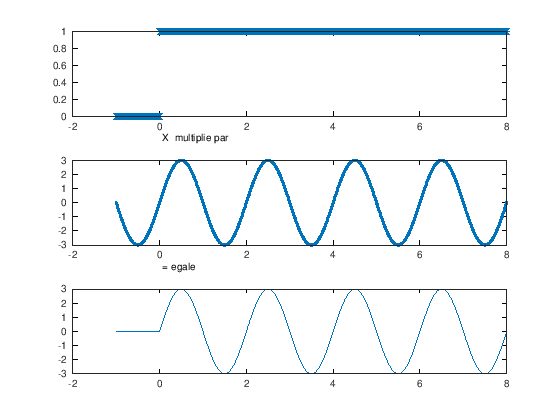

In [11]:
% subplot divise la fenêtre en plusieurs rangées et colonne sde graphiques
subplot(311) % 3 rangées, 1 colone, on se met dans le graphique 1 (en haut)
plot(t,gauche,'*');
text(0,-0.25, " X  multiplie par")
subplot(312) % 3 rangées, 1 colone, on se met dans le graphique 2 (au milieu)
plot(t,droite,'.');
text(0,-4.5, " = egale")
subplot(313) % 3 rangées, 1 colone, on se met dans le graphique 3 (en bas)
plot(t,gauche.*droite);


---
#  Séance 2 : équivalent exo 4 du sujet standard
---

- Afficher une somme de signaux correspondant à une série de Fourier
- Calculer numériquement une intégrale (valeur moyenne) : **Test moodle**

## Choses à faire pour cette séance
---

- installer octave sur son PC et apporter son PC si possible ;
- (en option) installer anaconda (distribution de python) utile pour les notebooks ;
- Reprendre mon script en un script au format GroupeA_NOM1_NOM2.m pour tracer la somme de la composante continue (utiliser la fonction `constante` de mon script) ajoutée à la fondamentale ajoutée au premier harmonique d'une des séries des [Exos 1.3 des SdF](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.5.9) et de l'[exo 7 des SdF](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.5.9)



### Réfléchir à un programme ADA capable de calculer l'intégrale d'un signal représenté par un tableau valeurs : intégrale de Rieman



![](integrale_Riemann.png)

Ne pas confondre 
 * la primitive $F$ d'une fonction $f$ qui dépend d'une borne $F : a \mapsto \int_{0}^{a}f(t)d(t)$ : Il s'agit ici de la primitive qui s'annule en 0 (prisée des traiteuses du signal et des automaticiennes, car on considère des signaux causaux). Une manière d'obtenir cette fonction primitive dans le cas discret (on ne dispose que d'échantillons de valeurs à des instants donnés : ce sont donc des suites numériques) est donnée dans l' [exercice 2.1 page 23 du poly de filtrage numérique](https://github.com/balaise31/Signal/blob/master/discret/poly/main.pdf#page=23)
* une intégrale qui est un nombre réel (lorsqu'elle converge) :
$\int_a^b f(t) dt = F(a) - F(b) = \lim_{dx\to 0}\sum_{k=0}^N f(k.dx).dx$


## Calculez l'intégrale demandée
---

Il faudra déposer votre fichier matlab capable de calculer une intégrale (par exemple  $\int\limits_{t=0}^{\pi}tcos(2t)dt$ ) [ici sur moodle](https://moodle.insa-toulouse.fr/mod/quiz/view.php?id=24772) contenant votre travail précédent (affichage des composantes) et ce calcul. Même si cela est sous la forme d'un QCM, il s'agit d'un dépôt de réponse et de fichier.

Créez la fonction `f` à intégrer, sous la forme d'une fonction en ligne, en vous demandant si le produit entre `t` et `cos(2*t)` doit être matriciel `*` ou élément par élément `.*` :

In [3]:
f = @(t) cos(2*t) *  t

f =

@(t) cos (2 * t) * t



Tester si cette fonction est bien vectorisée en calculant `f` pour tout les instants contenus dans le vecteur `t`. Stockez-le dans un vecteur `sig_f`.

La commande `sig_f = f(t)` doit donc fonctionner et vous devez observer dans le ***workspace*** un vecteur de valeurs.

Le but est maintenant de calculer la somme des valeurs de `sig_f` et de multiplier par $T_e$ pour avoir $\sum_{k=0}^N f(k.dx).dx$ avec $dx=T_e$. Vous pouvez utiliser une boucle for et une variable de cumulation `somme`, ou simplement appeler la fonction `sum` de matlab.


## Les exemples suivants peuvent vous inspirer et vous aider
--- 

Vous pouvez utiliser la commande `help` pour voir comment utiliser une fonction et avoir des exemples :
``` octave
   help for

   help sum
```
En complément voici des exemples proches de ce qu'il faut faire 

## Exemple d'utilisation de `sum` : la somme partielle d'une suite géométrique

Rappelons que la formule de répétition causale $f_r$ d'un signal impulsion $f$ répété N fois avec une période $T_0$ donnant la transformée de Laplace est :

$F_r(p) = F(p) . (e^{-0.Te.p} + \ldots + e^{-N.Te.p})$

où l'on voit que la somme des retards est une suite géométrique de raison $r=e^{-T_e.p}\in\mathrm{C}$.

Cette **série** géométrique (on parle donc de la suite des sommes partielles) peut converger vers $S_N=\frac{r^{N+1}-r^0}{r-1}\underset{N\to+\infty}{\rightarrow}\frac{1}{1-r}$ ssi $|r|<1$ ce qui impose certaines choses sur la valeur de p.

Ce qui donne pour une répétition infinie :

$F_r(p) = F(p) . \frac{1}{1 - e^{-Te.p}}$


Le programme si dessous calcule une somme partielle pour une valeur de $p$ et $T_0$ donnée :

In [35]:
% exemple de l'utilisation de sum pour calculer une somme partielle de suite géométrique
Te=1;
Tau = 0:Te:3*Te % les retards
p = 1+i; % une variable des valeurs possible de la variable de Laplace
Laplace = exp(-Tau*p) % Laplace des  retards pour une valeur de p
Somme = sum(Laplace) % Laplace de la somme des retards
% on vérifie avec la formule de somme partielle
(exp(-4*p)-exp(0*p))/(exp(-p)-1)

Tau =

   0   1   2   3

Laplace =

 Columns 1 through 3:

   1.00000 - 0.00000i   0.19877 - 0.30956i  -0.05632 - 0.12306i

 Column 4:

  -0.04929 - 0.00703i

Somme =  1.09316 - 0.43965i
ans =  1.09316 - 0.43965i


## Exemple d'utilisation de `for` : calcul de factorielle

Programme un peu stupide pour calculer la factorielle : on stocke dans un tableau `v` les valeurs de 1 à 4  et ensuite on multiplie chaque élément de ce tableau. 

In [23]:
% exemple de boucle dans un tableau pour calculer une factorielle
v=1:4
factorielle = 1 ;
% exemple pour boucler dans un tableau
for indice = 1:length(v)
    factorielle = factorielle * v(indice) ;
end

factorielle % sans ; pour afficher

v =

   1   2   3   4

factorielle =  24
